## Predictive modeling of customer bookings

Predictive modeling task. using various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

Firstly, exploring the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading customer bookings data
path = r"C:\Users\eniha\Downloads\customer_booking.csv"

df = pd.read_csv(path, encoding="latin-1")

EXPLORING THE DATA

In [3]:
#Inspecting loaded dataset
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#Dictionary to map days of week into categories
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

In [6]:
#Mapping the days to category
df['flight_day'] = df['flight_day'].map(mapping)

In [7]:
#inspecting mapped dataset
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


#Inspecting the data with visualizations

In [8]:
#numeric columns for correlation matrix
column_list = ['sales_channel', 'trip_type', 'route', 'booking_origin']
remove_column = df.columns.isin(column_list)

booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64


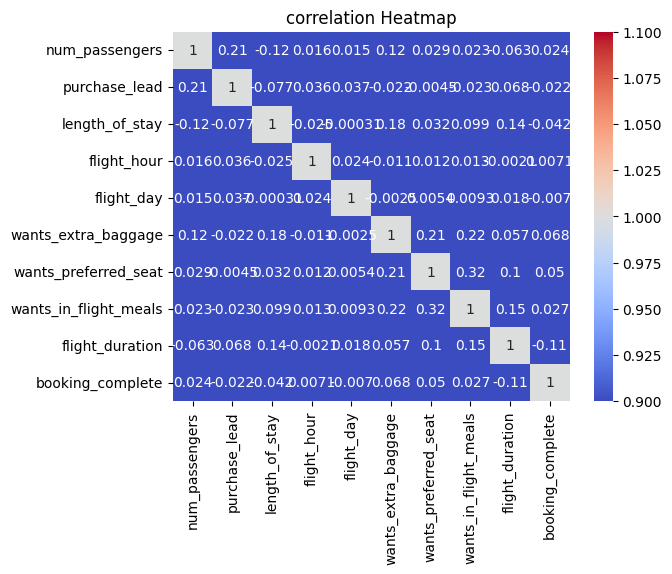

In [9]:
#Correlation matrix
correlation_matrix = df[df.columns[~remove_column]].corr()
print(correlation_matrix['booking_complete'].sort_values(ascending=False))

#Visualizing correlation matrix with heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('correlation Heatmap')
plt.show()

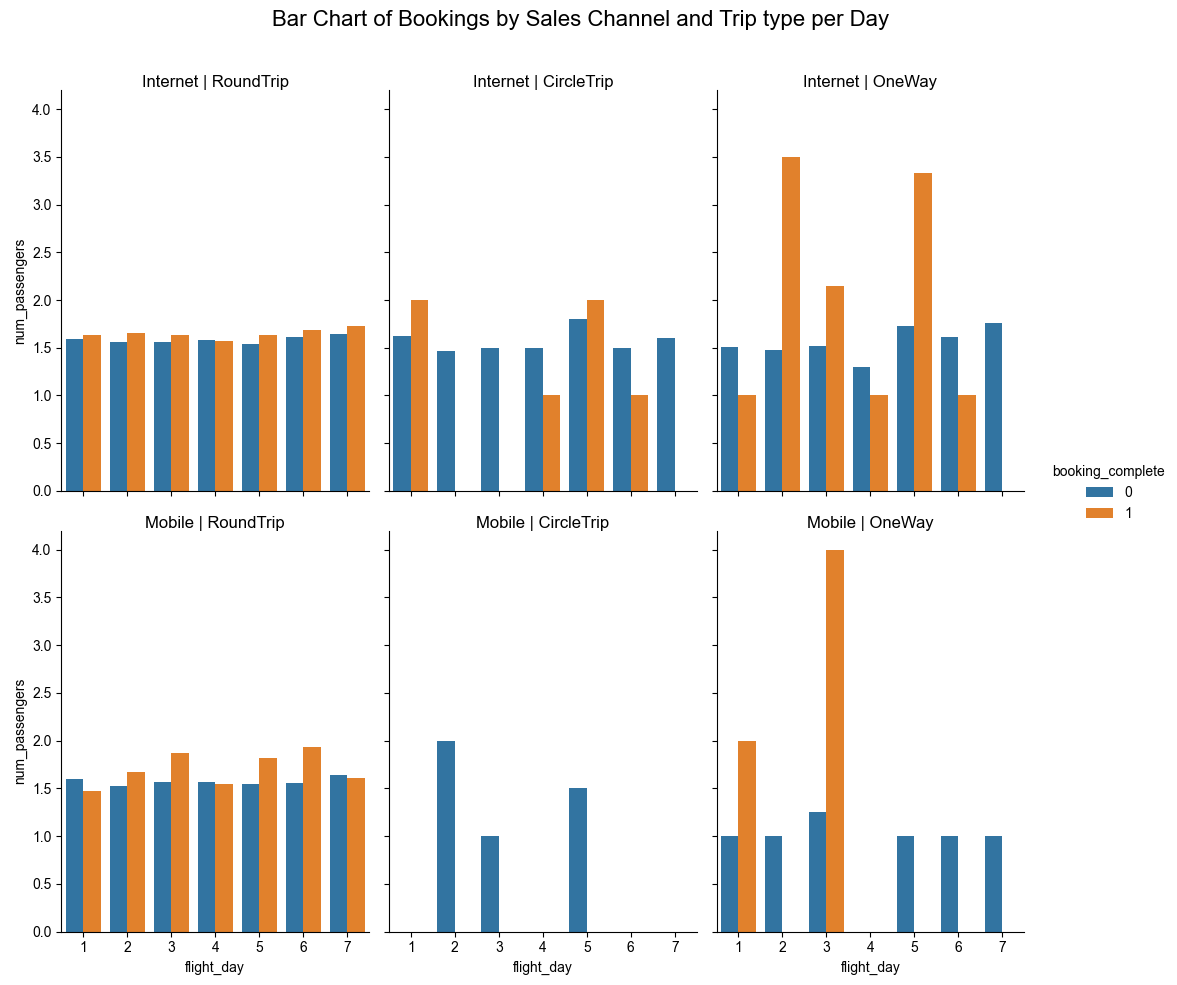

In [10]:
#Visualizing relationship between Bookings, Sales Channels and Trip type with bar chart
viz = sns.catplot(data=df, x= 'flight_day', y='num_passengers', hue='booking_complete', row='sales_channel',col = 'trip_type', kind='bar', height=5, aspect=0.7,errorbar=None)
viz.set_titles(row_template="{row_name}", col_template="{col_name}", size=12, pad=0)
viz.fig.suptitle('Bar Chart of Bookings by Sales Channel and Trip type per Day', size=16)
plt.subplots_adjust(top=0.9)
sns.set_palette('pastel')
sns.set(style='white', context='poster')
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor': 'lightgray'})
plt.show()

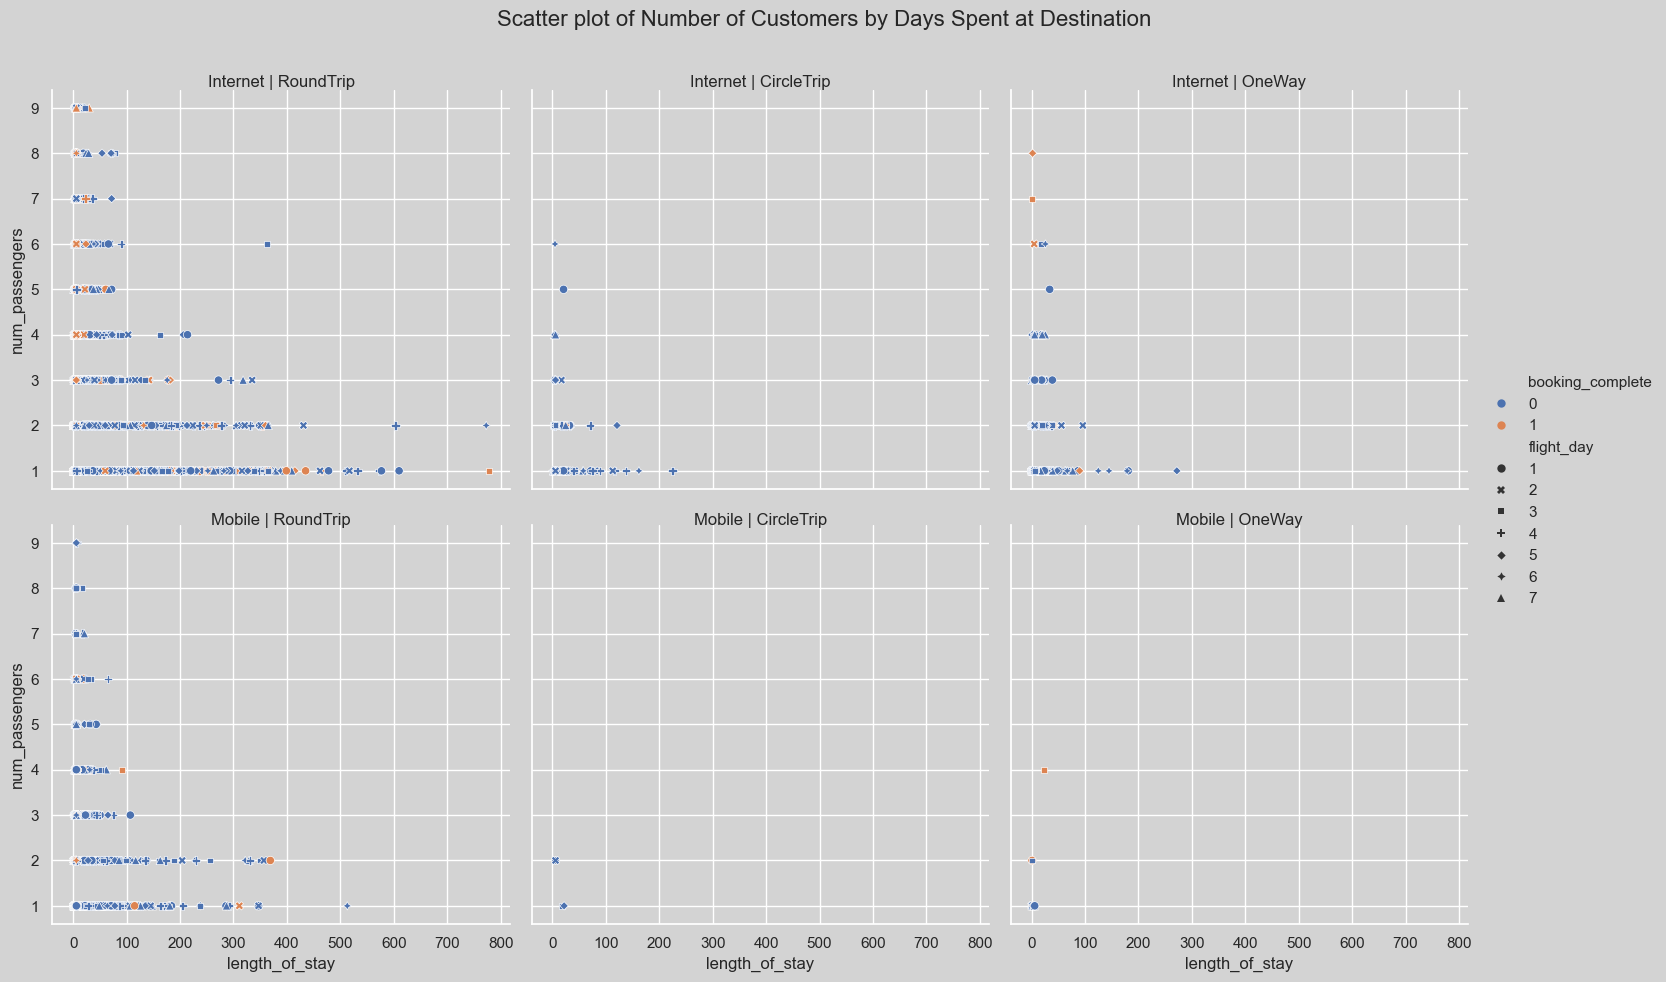

In [11]:
#Scatterplot showing How long customers stays at their destination  
viz2 = sns.relplot(data=df, x='length_of_stay', y='num_passengers', hue='booking_complete', hue_order=[0,1], row='sales_channel', col='trip_type', style='flight_day', kind='scatter')
viz2.set_titles(row_template="{row_name}", col_template="{col_name}", size=12, pad=0)
viz2.fig.suptitle('Scatter plot of Number of Customers by Days Spent at Destination', size=16)
plt.subplots_adjust(top=0.9)
plt.show()

FEATURE ENGINEERING AND MARCHINE LEARNING

In [12]:
#Importing important Libraries 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, auc, average_precision_score

In [13]:
#Make a copy of dataset to be used for feature engineering
model_data = df.copy()

In [14]:
#Inspect data
model_data.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [15]:
#Converting Sales channel and Trip type to numerical data 
model_data = pd.get_dummies(model_data, columns=["sales_channel", 'trip_type'])

In [16]:
#Inspect the converted columns
model_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,True,False,False,False,True
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,True,False,False,False,True
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True


In [17]:
#Droping other columns not converted 
model_data.drop(['route', 'booking_origin'], axis=1, inplace=True)

In [18]:
#Spliting the dataset into Feature data and target data
X = model_data.drop('booking_complete', axis=1)
y = model_data['booking_complete']

In [19]:
#Spliting both feature data and target data into training and test data with 20% of data used as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [20]:
#Assinging RandomForestClassifier model
rfC = RandomForestClassifier()

In [21]:
#Defining hyperparameters to be used in RandomizedSearchCV
param_grid = { 'n_estimators': [50, 100], 
              'max_depth': [None, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]  }


In [22]:
#Defining the RandomizedSearchCV with 3folds cross-validation
random_search = RandomizedSearchCV(estimator= rfC, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=1, random_state=12)


In [23]:
#Fitting model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=12, scoring='accuracy')

In [24]:
#Inspecting best parameters to be used for prediction
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [25]:
#Select best model
best_model = random_search.best_estimator_

In [26]:
#Make predictions
y_predict = best_model.predict(X_test)

In [27]:
param_distributions = random_search.param_distributions
param_distributions

{'n_estimators': [50, 100],
 'max_depth': [None, 10],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [28]:
#Inspecting the prediction attributes
all_scores = random_search.cv_results_['mean_test_score']
best_score = random_search.best_score_
num_iterations = random_search.n_iter

In [29]:
print("Best Hyperparameters:", best_params)
print("Best Cross-Validated Score:", best_score)
print("Best Estimator Details:", best_model)
print("Number of Iterations:", num_iterations)
print("Summary of Cross-Validated Scores:", all_scores)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best Cross-Validated Score: 0.8515000035642859
Best Estimator Details: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)
Number of Iterations: 5
Summary of Cross-Validated Scores: [0.85127501 0.8512     0.851275   0.85125    0.8515    ]


In [30]:
#Other Attributes
fpr, tpr, _ = roc_curve(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
classification_report_test = classification_report(y_test, y_predict)
confusion_matrix = confusion_matrix(y_test, y_predict, labels= [0, 1])
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
harmonic_mean = f1_score(y_test, y_predict)
roc_auc = auc(fpr, tpr)
precision2, recall2, _ = precision_recall_curve (y_test, y_predict) 


In [31]:

print("Test Accuracy:", accuracy)
print("Classification Report (Test Set):\n", classification_report_test)
print("Confusion Matrix (Test Set):\n", confusion_matrix) 



Test Accuracy: 0.8472
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8477
           1       0.44      0.01      0.02      1523

    accuracy                           0.85     10000
   macro avg       0.64      0.50      0.47     10000
weighted avg       0.79      0.85      0.78     10000

Confusion Matrix (Test Set):
 [[8455   22]
 [1506   17]]


VISUALIZING MODEL AND PREDICTION RESULTS

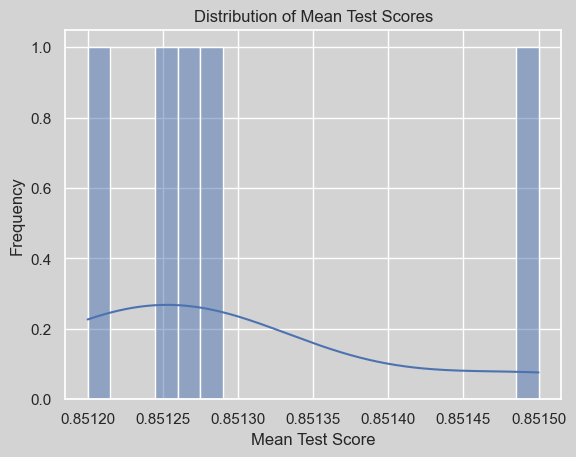

In [32]:
#Mean Score distribution
sns.histplot(all_scores, bins=20, kde=True)
plt.title('Distribution of Mean Test Scores')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

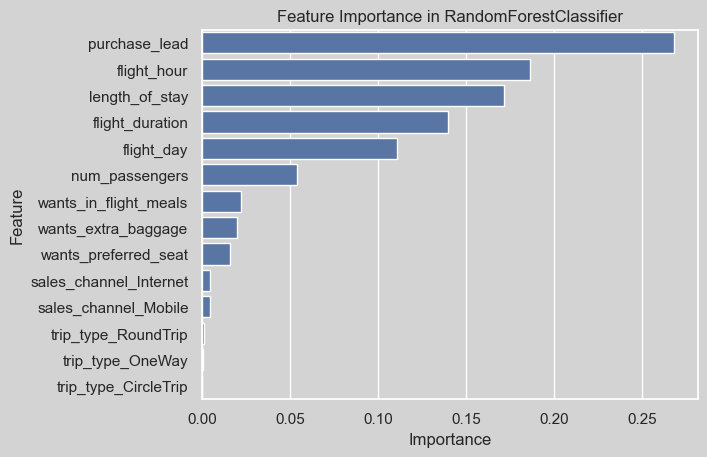

In [34]:
#visualization of contribution of each feature to the target prediction
feature_importance = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

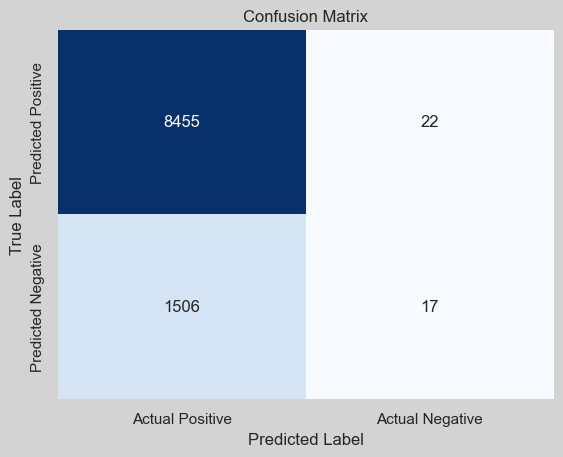

In [35]:
#Visualization of prediction confusion matrix
confusion_df = pd.DataFrame(confusion_matrix, index=['Predicted Positive', 'Predicted Negative'], 
                            columns=['Actual Positive', 'Actual Negative'])

sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

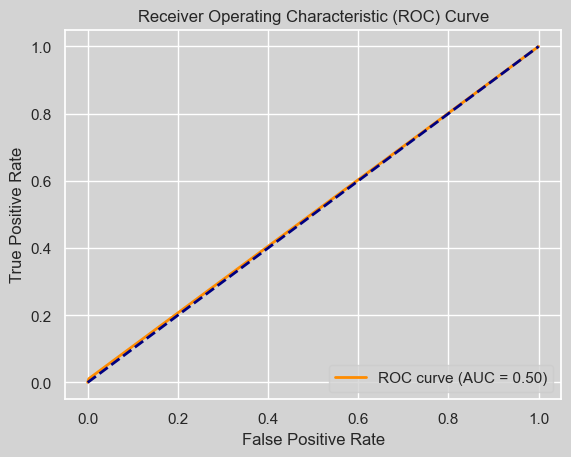

In [36]:
#Plot of AUC-ROC and ROC curve to give insight into discriminatory power of model
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()